#**SPEECH AND LANGUAGE RECOGNITION PROJECT : Legal Cite Text Categorization and Classification Using BERTopic Deep Learning Model on English-to-Hindi Dataset**

Legal cite text classification refers to the process of automatically categorizing legal texts (such as court rulings, statutes, or legal documents) into predefined categories, using machine learning techniques. This is useful in legal research, document management, and case analysis. One of the most effective ways to achieve this is by using BERT (Bidirectional Encoder Representations from Transformers), a pre-trained language model designed for natural language understanding.


#**PT.1. Steps of EDA Data Collection**

Import and collect information from databases, CSV files, APIs and other.
They should be able to ensure that the collected data contain information that will be helpful in making the analysis.


**Data Cleaning:** Imputation, which is the process of filling up the missing data or removing samples with missing data all together.Remove duplicates.
Edit for Grammar, spelling, and punctuation, as well as for wrong or missing inclusive language.

**Data Profiling:** The first thing that every engineer scientists needs to know is the structure of the data.Get mean, median, mode, and standard deviation of a set of data.Category variables (Nominal, Ordinal).

**Data Visualization:** Illustrate the data in order to attempt to better understand it.

**Common visualizations include:**
Histograms for distribution.
Box plots for outliers.
Relationships by use of scatter plots.
Univariate Analysis

The analysis of each of these variables must be done separately.
Search for dispersion and concentration as well as quantitiave measures of variation.

**Bivariate Analysis:** : Interconnect two variables.Some of the correlation coefficients and scatter plots can be utilized in the case.

**Multivariate Analysis:**: Study patterns for 2 or more variables.
Adjust them by using pair plots or principal component analysis (PCA).


\

**Feature Engineering -> New features arose from existing data.**
Pre-processing transform variables for example normalization, encode categorical variables.
Hypothesis Testing

Develop and analyse hypothesis if any from the data to be collected.
If the a priori assumptions are made, then employ statistical tests in order to corroborate these suppositions.

\

**Documentation**
Sign and record observations and observations.Be ready with visuals

\

**Conclusion**
These steps give a roadmap for EDA which enables the analyst to make proper decisions that would result from the findings of the exploratory analysis. If anyone wants exact explanation of any step, don’t hesitate to ask!

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('english_to_hindi.csv')

In [ ]:
df

number                                   english_sentence  \
0          0  politicians do not have permission to do what ...   
1          1         I'd like to tell you about one such child,   
2          2  This percentage is even greater than the perce...   
3          3  what we really mean is that they're bad at not...   
4          4  .The ending portion of these Vedas is called U...   
...      ...                                                ...   
1995    1995  You 'll share in their achievements and be the...   
1996    1996  after scientific consensus also the causes of ...   
1997    1997                                  He's like, “Huh!”   
1998    1998  The neck is heavy , the ears are flabby , the ...   
1999    1999                          she could not prostitute,   

                                         hindi_sentence  
0     राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...  
1     मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...  
2      यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।  
3        हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते  
4           इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।  
...                                                 ...  
1995  आप उनकी उपलब्धियों में भागीदार होंगे और उनकी ज...  
1996  वैज्ञानिक आम सहमति (scientific consensus) होने...  
1997                                     वोह बोला “हैं”  
1998  गर्दन इनकी भारी होती है.कान मांसल , सींग मुड़े...  
1999                     वह वेश्यावृति नहीं कर सकती थी,  

[2000 rows x 3 columns]

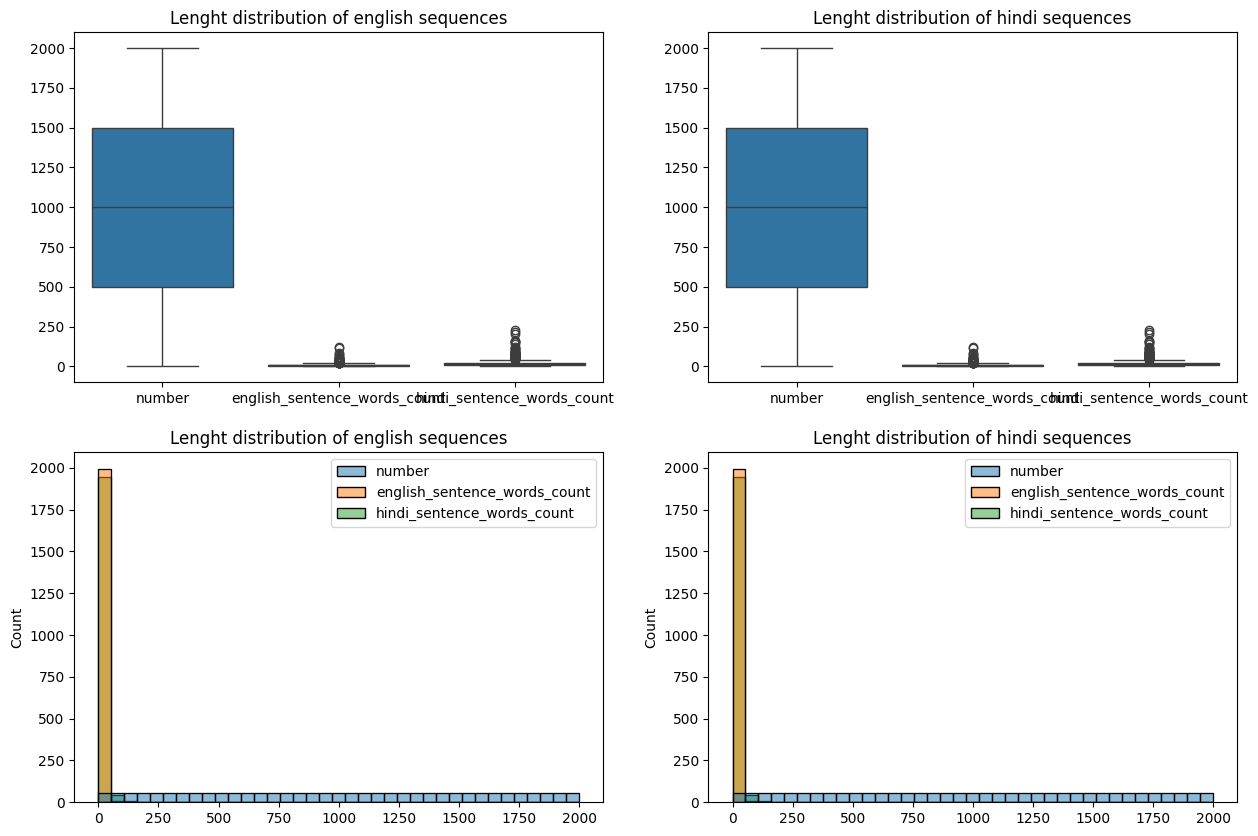

In [ ]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
plt.title("Lenght distribution of english sequences")
sns.boxplot(data=df)

plt.subplot(2, 2, 2)
plt.title("Lenght distribution of hindi sequences")
sns.boxplot(data=df)

plt.subplot(2, 2, 3)
plt.title("Lenght distribution of english sequences")
sns.histplot(data=df)

plt.subplot(2, 2, 4)
plt.title("Lenght distribution of hindi sequences")
sns.histplot(data=df)

plt.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd

# Sample DataFrame
# Replace 'english_sentence_length' and 'hindi_sentence_length' with actual column names
df = pd.DataFrame({
    'english_sentence_length': [len(sentence) for sentence in ['This is an example', 'Another sentence', 'Plotly example sentence']],
    'hindi_sentence_length': [len(sentence) for sentence in ['यह एक उदाहरण है', 'एक और वाक्य', 'प्लॉटली उदाहरण वाक्य']]
})

# Create a subplot figure with a 2x2 grid
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "Length distribution of English sequences (Boxplot)",
    "Length distribution of Hindi sequences (Boxplot)",
    "Length distribution of English sequences (Histogram)",
    "Length distribution of Hindi sequences (Histogram)"
))

# Add boxplots to the subplots
fig.add_trace(px.box(df, y="english_sentence_length").data[0], row=1, col=1)
fig.add_trace(px.box(df, y="hindi_sentence_length").data[0], row=1, col=2)

# Add histograms to the subplots
fig.add_trace(px.histogram(df, x="english_sentence_length").data[0], row=2, col=1)
fig.add_trace(px.histogram(df, x="hindi_sentence_length").data[0], row=2, col=2)

# Set the overall layout and title
fig.update_layout(height=800, width=1200, title_text="Sentence Length Distributions")
fig.show()

In [ ]:
!pip install googletrans

In [ ]:
df.isnull().sum()

number              0
english_sentence    0
hindi_sentence      0
dtype: int64

In [ ]:
df = df.drop_duplicates().dropna()

In [ ]:
df_counts = df['number'].value_counts().sort_values()

In [ ]:
df['english_sentence_length'] = df['english_sentence'].str.len()
df['hindi_sentence_length'] = df['hindi_sentence'].str.len()
df['english_sentence_length'] = np.log(1+df['english_sentence_length'])
df['hindi_sentence_length'] = np.log(1+df['hindi_sentence_length'])

<Axes: >

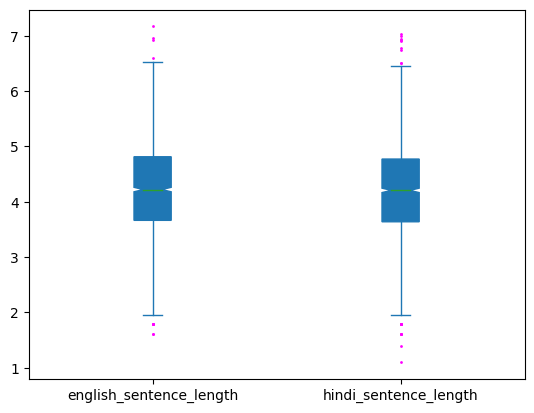

In [ ]:
# box plot of length
flierprops = {'markerfacecolor': 'fuchsia', 'marker': 'o', 'markersize': 2, 'markeredgewidth': 0.0}
df[['english_sentence_length', 'hindi_sentence_length']].plot.box(flierprops=flierprops, notch=True, patch_artist=True, labels=['english sentence log length', 'hindi sentence log length'])

Text(0.5, 0, 'Case Title Length between English Sentences and their respective Hindi Translated Sentences')

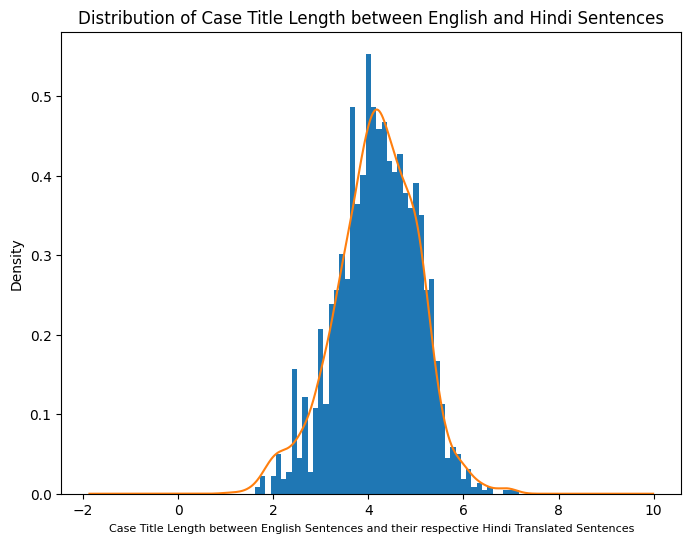

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df['english_sentence_length'].plot.hist(bins=50,ylim=0, density=True, title= 'Distribution of Case Title Length between English and Hindi Sentences')
df['hindi_sentence_length'].plot.kde(ylim=0)
plt.xlabel('Case Title Length between English Sentences and their respective Hindi Translated Sentences', fontsize = 8)

<Axes: xlabel='english_sentence_length', ylabel='hindi_sentence_length'>

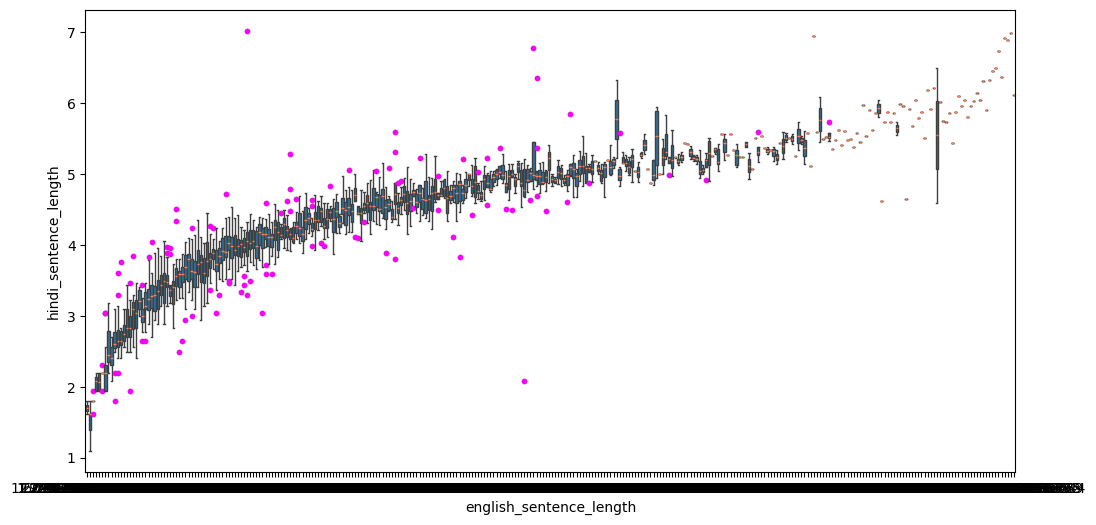

In [ ]:
flierprops = {'markerfacecolor': 'fuchsia', 'marker': 'o', 'markersize': 4, 'markeredgewidth': 0.1}
import seaborn as sns
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='english_sentence_length', y='hindi_sentence_length', flierprops=flierprops, medianprops={"color": "coral"})

#**TOKENIZATION**

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [ ]:
import string # Import the string module

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
#storing the puntuation free text
df['english_sentence']=df['english_sentence'].astype('str')
df['english_sentence']=df['english_sentence'].apply(lambda x:remove_punctuation(x))

#Making the case consistent as lower
df['english_sentence']=df['english_sentence'].apply(lambda x: x.lower())
df['english_sentence']=df['english_sentence'].str.replace('\d+', '')

#Removing Stop Words
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['english_sentence']=df['english_sentence']
df['english_sentence']=df['english_sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#storing the puntuation free text
df['hindi_sentence']=df['hindi_sentence'].astype('str')
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x:remove_punctuation(x))

#Making the case consistent as lower
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: x.lower())
df['hindi_sentence']=df['hindi_sentence'].str.replace('\d+', '')

#Removing Stop Words
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['hindi_sentence']=df['hindi_sentence']
df['hindi_sentence']=df['hindi_sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df['english_sentence_words_count']=df['english_sentence'].apply(lambda x: len(x.split()))
df['hindi_sentence_words_count']=df['hindi_sentence'].apply(lambda x: len(x.split()))

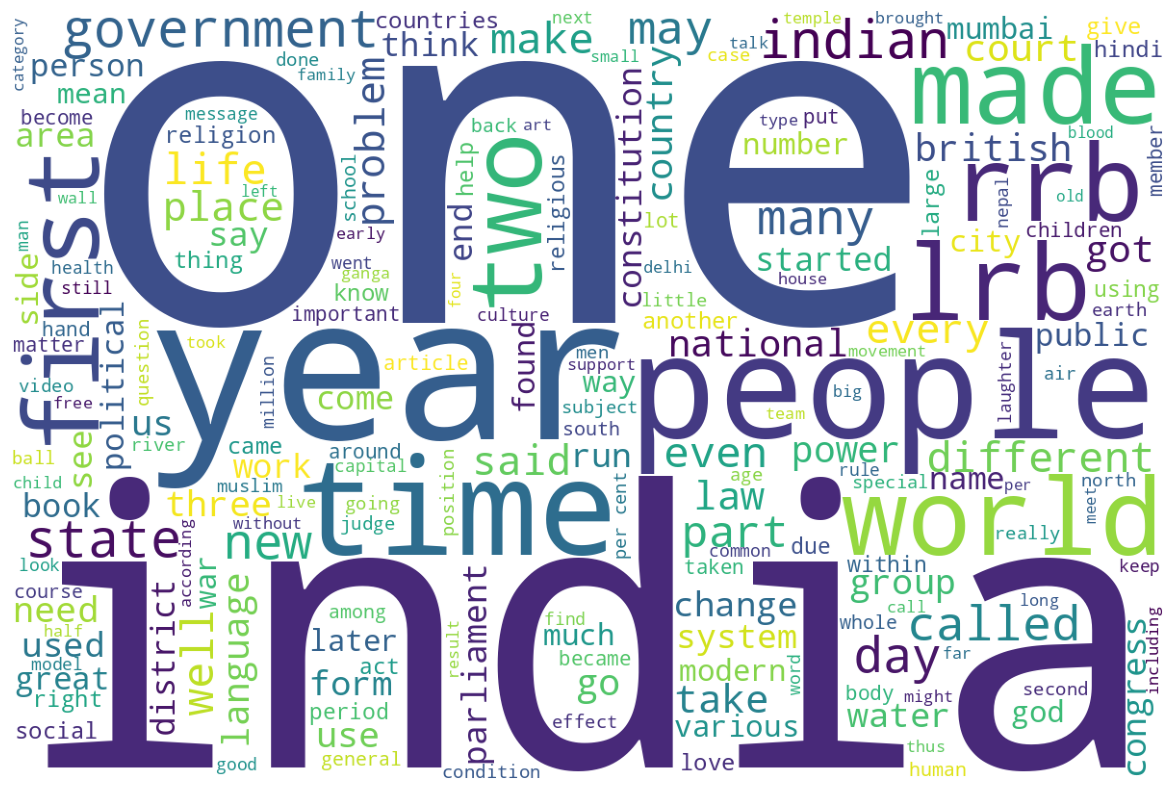

In [ ]:
from wordcloud import WordCloud

fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
Cloud_text = ' '.join(df['english_sentence'])
wordcloud2 = WordCloud( background_color = 'white',width=1200, height=800).generate(Cloud_text)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
!wget -q -O /usr/share/fonts/truetype/NotoSansDevanagari-Regular.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf

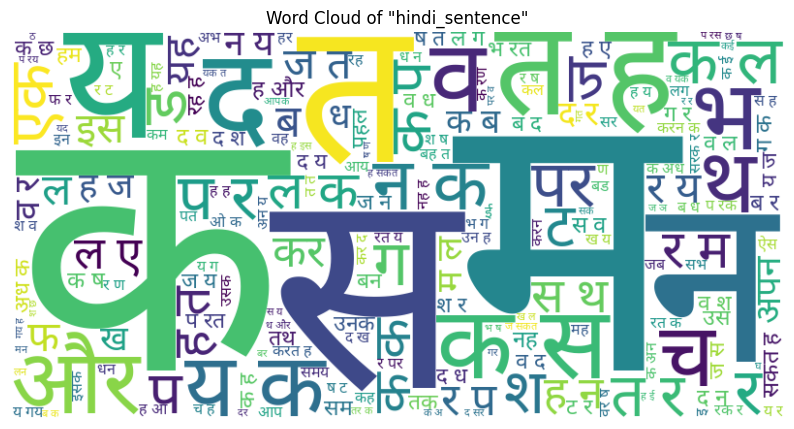

In [ ]:
import matplotlib.pyplot as plt

hindi_text = ' '.join(sentence for sentence in df['hindi_sentence'])
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/NotoSansDevanagari-Regular.ttf',  # Path to the downloaded font
    width=800,
    height=400,
    background_color='white'
).generate(hindi_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of "hindi_sentence"')
plt.show()

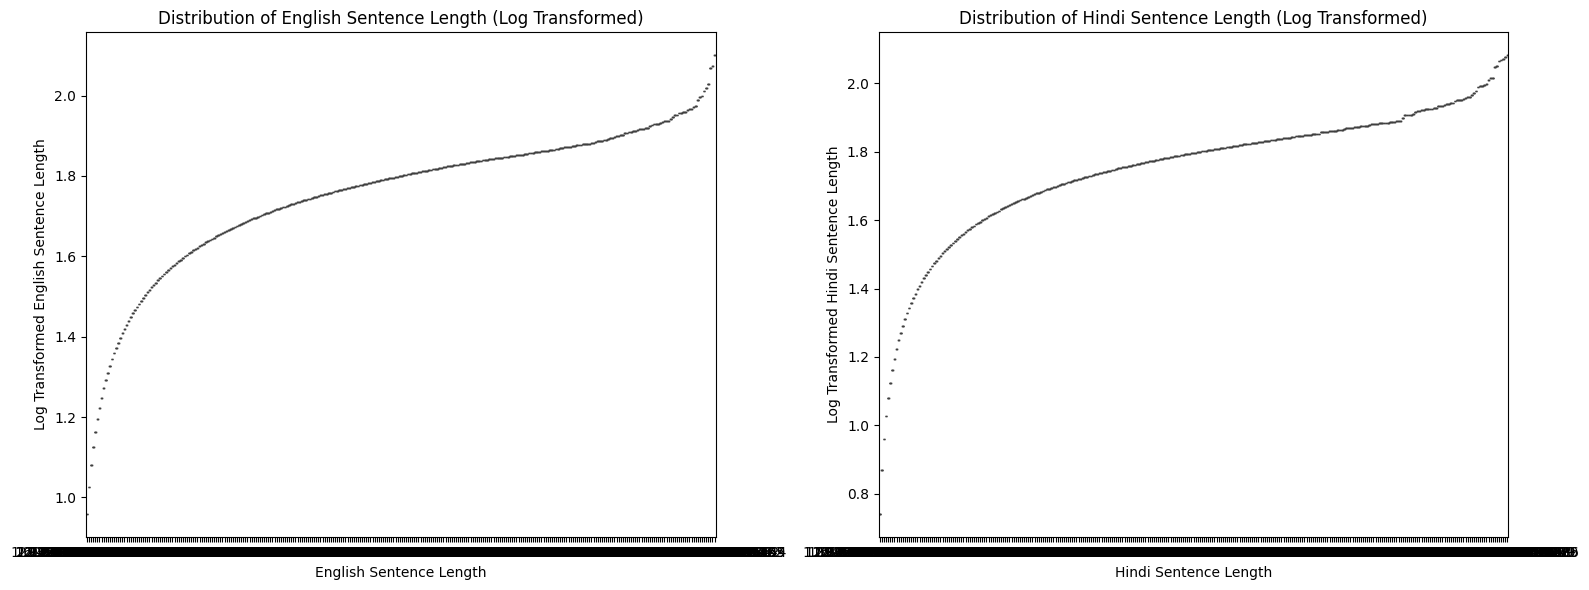

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Log transformation for both English and Hindi sentence lengths
df['english_sentence_length_log'] = np.log(1 + df['english_sentence_length'])
df['hindi_sentence_length_log'] = np.log(1 + df['hindi_sentence_length'])

# Define properties for outliers
flierprops = {'markerfacecolor': 'fuchsia', 'marker': 'o', 'markersize': 4, 'markeredgewidth': 0.1}

# Create subplots for side-by-side box plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# English sentence length box plot
sns.boxplot(ax=axes[0], data=df, x='english_sentence_length', y='english_sentence_length_log', flierprops=flierprops)
axes[0].set_title('Distribution of English Sentence Length (Log Transformed)')
axes[0].set_xlabel('English Sentence Length')
axes[0].set_ylabel('Log Transformed English Sentence Length')

# Hindi sentence length box plot
sns.boxplot(ax=axes[1], data=df, x='hindi_sentence_length', y='hindi_sentence_length_log', flierprops=flierprops)
axes[1].set_title('Distribution of Hindi Sentence Length (Log Transformed)')
axes[1].set_xlabel('Hindi Sentence Length')
axes[1].set_ylabel('Log Transformed Hindi Sentence Length')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#**TOP Words**

**For English:**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)  # Use 'english' stopwords
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    if n is not None:
        return words_freq[:n]
    return words_freq

top_words = get_top_n_words(df['english_sentence'].tolist(), n=100)  # Get top 20 words
print("Top 100 words in English sentences:")
for word, freq in top_words:
    print(f"{word}: {freq}")

Top 100 words in English sentences:
india: 90
people: 73
like: 62
time: 54
world: 52
rrb: 52
lrb: 51
years: 49
government: 43
indian: 42
called: 39
state: 38
new: 37
life: 33
year: 33
different: 31
said: 30
british: 27
make: 27
country: 27
got: 27
national: 26
day: 25
water: 24
court: 23
congress: 23
used: 23
place: 22
law: 22
constitution: 22
use: 21
parliament: 21
end: 21
started: 21
public: 20
great: 20
think: 20
political: 20
just: 20
going: 19
language: 19
mumbai: 19
hindi: 19
district: 19
modern: 18
later: 18
did: 18
various: 18
large: 18
city: 18
number: 17
general: 17
love: 17
countries: 17
power: 17
social: 17
work: 17
group: 17
days: 17
came: 17
war: 17
air: 17
say: 16
religious: 16
second: 16
using: 16
problem: 16
important: 16
000: 16
children: 16
taken: 16
person: 16
body: 16
religion: 15
south: 15
know: 15
help: 15
does: 15
north: 15
child: 14
really: 14
special: 14
cent: 14
need: 14
right: 14
left: 14
age: 14
little: 14
earth: 14
party: 14
men: 14
ve: 14
course: 14
god: 

In [ ]:
common_words = get_top_n_words(df['english_sentence'])
df_unigram = pd.DataFrame(common_words[:20], columns = ['Word' , 'count']).sort_values(by="count",ascending=False).reset_index(drop=True)

<Axes: ylabel='Word'>

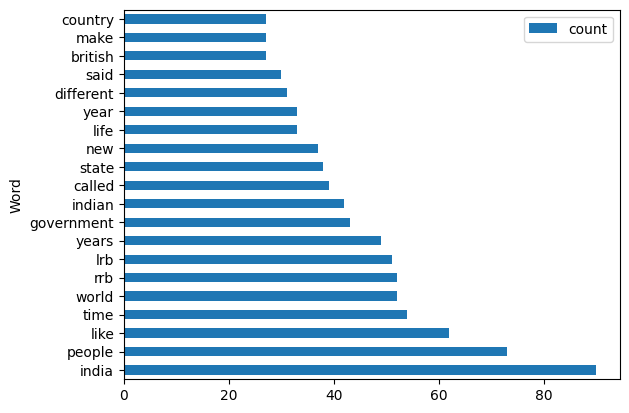

In [ ]:
df_unigram.plot.barh(x='Word', y='count')

<Axes: ylabel='Frequency'>

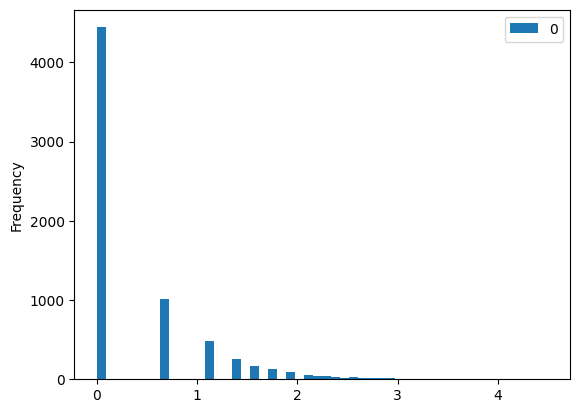

In [ ]:
import math
pd.DataFrame(map(lambda x: math.log(x[1]), common_words)).plot.hist(bins=50)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=20000,stop_words='english')
vectors = tfidf.fit_transform(df['english_sentence'])

In [ ]:
vectors

<2000x638 sparse matrix of type '<class 'numpy.float64'>'
	with 5853 stored elements in Compressed Sparse Row format>

In [ ]:
feature_names = tfidf.get_feature_names_out()
tf_idf_array = vectors.toarray()

In [ ]:
#tf_idf_df = pd.DataFrame(data=tf_idf_array, columns=list(feature_names))
count_lst = tf_idf_array.sum(axis=0)
mean_lst = tf_idf_array.mean(axis=0)
vocab_df = pd.DataFrame((zip(feature_names,count_lst, mean_lst)),columns= ["vocab","tfidf_sum_value", "tfidf_mean_value"]).sort_values(by="tfidf_mean_value",ascending=False).reset_index(drop=True)

In [ ]:
print(count_lst)

[ 6.28132938  5.43152642  1.92791587  2.27722622  2.26943121  2.09625035
  3.44905701  2.61742383  2.73945607  2.67140308  3.83093561  3.89867253
  3.46281013  2.8068477   3.00266407  3.01873608  4.76520854  3.04351409
  5.0758885   3.95546296  2.06852579  2.82388394  3.46696219  5.97351268
  7.19487003  3.37736955  5.56668092  3.54420609  3.87384188  3.80600294
  4.65987771  3.35594788  2.99437662  5.15634651  4.5779636   4.99655149
  5.2570101   3.65588987  2.13128303  4.0591852   3.19567277  3.8156385
  2.14947934  3.48709483  3.09414957  2.98512132  5.0541342   3.87830621
  2.71219576  3.77007035  3.76396382  2.29213579  3.05875713  3.5690136
  3.27543184  3.55130665  2.89958905  4.59085753  5.45483892  2.90296948
  6.32772373  3.71661344  3.34984927  7.34885002  4.8785634   3.25699072
  2.74404578  3.37183562  2.9683078  10.50636814  3.47728124  5.79568845
  3.15136476  3.60002214  2.84739771 16.24325295  9.34386737  1.9360944
  4.51697395  4.44594197  2.32763118  5.23384367  1.84

In [ ]:
print(mean_lst)

[0.00314066 0.00271576 0.00096396 0.00113861 0.00113472 0.00104813
 0.00172453 0.00130871 0.00136973 0.0013357  0.00191547 0.00194934
 0.00173141 0.00140342 0.00150133 0.00150937 0.0023826  0.00152176
 0.00253794 0.00197773 0.00103426 0.00141194 0.00173348 0.00298676
 0.00359744 0.00168868 0.00278334 0.0017721  0.00193692 0.001903
 0.00232994 0.00167797 0.00149719 0.00257817 0.00228898 0.00249828
 0.00262851 0.00182794 0.00106564 0.00202959 0.00159784 0.00190782
 0.00107474 0.00174355 0.00154707 0.00149256 0.00252707 0.00193915
 0.0013561  0.00188504 0.00188198 0.00114607 0.00152938 0.00178451
 0.00163772 0.00177565 0.00144979 0.00229543 0.00272742 0.00145148
 0.00316386 0.00185831 0.00167492 0.00367443 0.00243928 0.0016285
 0.00137202 0.00168592 0.00148415 0.00525318 0.00173864 0.00289784
 0.00157568 0.00180001 0.0014237  0.00812163 0.00467193 0.00096805
 0.00225849 0.00222297 0.00116382 0.00261692 0.00092407 0.00421159
 0.00154858 0.00285533 0.0014985  0.0014287  0.00282789 0.0010094

In [ ]:
print(vocab_df)

           vocab  tfidf_sum_value  tfidf_mean_value
0         people        33.290981          0.016645
1          india        30.723142          0.015362
2          world        25.727671          0.012864
3           like        25.189821          0.012595
4          years        19.324300          0.009662
..           ...              ...               ...
633        cases         1.848142          0.000924
634      eastern         1.837619          0.000919
635       passed         1.810506          0.000905
636  legislature         1.734268          0.000867
637      message         1.712778          0.000856

[638 rows x 3 columns]


In [ ]:
vocab_df.head()

vocab  tfidf_sum_value  tfidf_mean_value
0  people        33.290981          0.016645
1   india        30.723142          0.015362
2   world        25.727671          0.012864
3    like        25.189821          0.012595
4   years        19.324300          0.009662

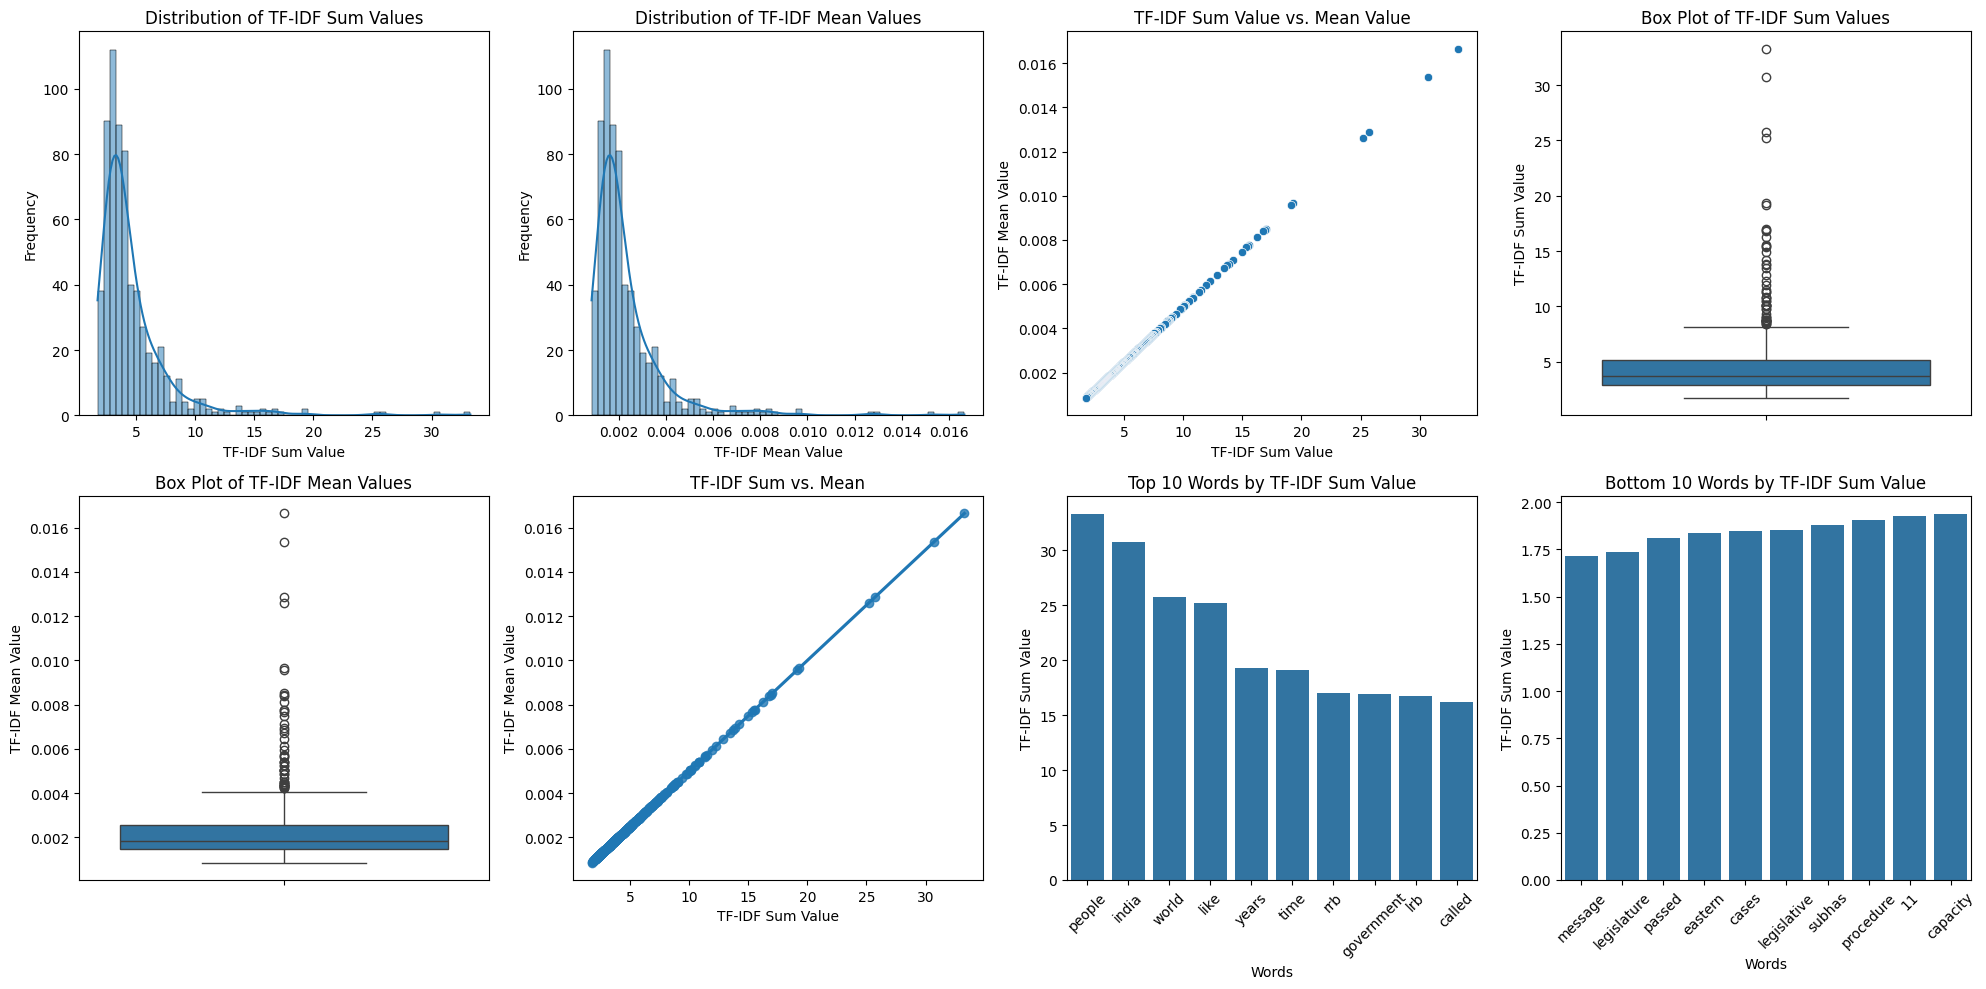

In [ ]:
# Set the figure size and layout
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# 1. Histogram of tfidf_sum_value
sns.histplot(vocab_df['tfidf_sum_value'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of TF-IDF Sum Values')
axes[0, 0].set_xlabel('TF-IDF Sum Value')
axes[0, 0].set_ylabel('Frequency')

# 2. Histogram of tfidf_mean_value
sns.histplot(vocab_df['tfidf_mean_value'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of TF-IDF Mean Values')
axes[0, 1].set_xlabel('TF-IDF Mean Value')
axes[0, 1].set_ylabel('Frequency')

# 3. Scatter plot of tfidf_sum_value vs tfidf_mean_value
sns.scatterplot(x='tfidf_sum_value', y='tfidf_mean_value', data=vocab_df, ax=axes[0, 2])
axes[0, 2].set_title('TF-IDF Sum Value vs. Mean Value')
axes[0, 2].set_xlabel('TF-IDF Sum Value')
axes[0, 2].set_ylabel('TF-IDF Mean Value')

# 4. Box plot of tfidf_sum_value
sns.boxplot(y='tfidf_sum_value', data=vocab_df, ax=axes[0, 3])
axes[0, 3].set_title('Box Plot of TF-IDF Sum Values')
axes[0, 3].set_ylabel('TF-IDF Sum Value')

# 5. Box plot of tfidf_mean_value
sns.boxplot(y='tfidf_mean_value', data=vocab_df, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of TF-IDF Mean Values')
axes[1, 0].set_ylabel('TF-IDF Mean Value')

# 6. TFIDF Sum vs Mean (Scatter plot with regression line)
sns.regplot(x='tfidf_sum_value', y='tfidf_mean_value', data=vocab_df, ax=axes[1, 1])
axes[1, 1].set_title('TF-IDF Sum vs. Mean')
axes[1, 1].set_xlabel('TF-IDF Sum Value')
axes[1, 1].set_ylabel('TF-IDF Mean Value')

# 7. Top N Words by TF-IDF Sum Value
top_n = 10  # Adjust the number of top words
top_words = vocab_df.sort_values('tfidf_sum_value', ascending=False).head(top_n)
sns.barplot(x=top_words['vocab'], y=top_words['tfidf_sum_value'], ax=axes[1, 2])
axes[1, 2].set_title(f'Top {top_n} Words by TF-IDF Sum Value')
axes[1, 2].set_xlabel('Words')
axes[1, 2].set_ylabel('TF-IDF Sum Value')
axes[1, 2].tick_params(axis='x', rotation=45)

# 8. Bottom N Words by TF-IDF Sum Value
bottom_n = 10  # Adjust the number of bottom words
bottom_words = vocab_df.sort_values('tfidf_sum_value', ascending=True).head(bottom_n)
sns.barplot(x=bottom_words['vocab'], y=bottom_words['tfidf_sum_value'], ax=axes[1, 3])
axes[1, 3].set_title(f'Bottom {bottom_n} Words by TF-IDF Sum Value')
axes[1, 3].set_xlabel('Words')
axes[1, 3].set_ylabel('TF-IDF Sum Value')
axes[1, 3].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**-> PYTHON STILL DOES NOT HAVE NLTK LIBRARY WITH CAPABILITY OF DISPLAYING STOPWORDS IN HINDI**

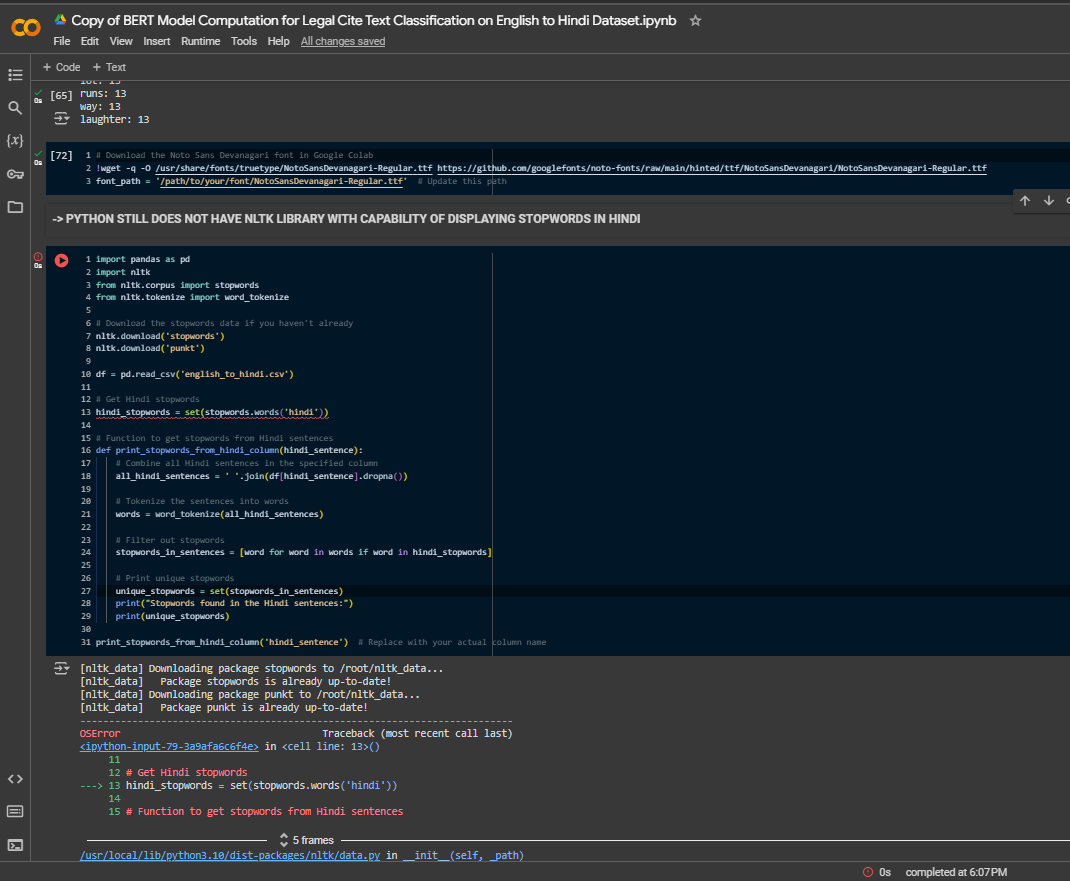

#**With vocab:**

In [ ]:
df = pd.read_csv('/content/english_to_hindi.csv')
df

number                                   english_sentence  \
0          0  politicians do not have permission to do what ...   
1          1         I'd like to tell you about one such child,   
2          2  This percentage is even greater than the perce...   
3          3  what we really mean is that they're bad at not...   
4          4  .The ending portion of these Vedas is called U...   
...      ...                                                ...   
1995    1995  You 'll share in their achievements and be the...   
1996    1996  after scientific consensus also the causes of ...   
1997    1997                                  He's like, “Huh!”   
1998    1998  The neck is heavy , the ears are flabby , the ...   
1999    1999                          she could not prostitute,   

                                         hindi_sentence  
0     राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...  
1     मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...  
2      यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।  
3        हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते  
4           इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।  
...                                                 ...  
1995  आप उनकी उपलब्धियों में भागीदार होंगे और उनकी ज...  
1996  वैज्ञानिक आम सहमति (scientific consensus) होने...  
1997                                     वोह बोला “हैं”  
1998  गर्दन इनकी भारी होती है.कान मांसल , सींग मुड़े...  
1999                     वह वेश्यावृति नहीं कर सकती थी,  

[2000 rows x 3 columns]

In [ ]:
dfe = df['english_sentence'].str.lower().drop_duplicates().dropna()
dfh = df['hindi_sentence'].str.lower().drop_duplicates().dropna()

In [ ]:
combined_dfeh = pd.DataFrame({'english_sentence': dfe, 'hindi_sentence': dfh})
combined_dfeh

english_sentence  \
0     politicians do not have permission to do what ...   
1            i'd like to tell you about one such child,   
2     this percentage is even greater than the perce...   
3     what we really mean is that they're bad at not...   
4     .the ending portion of these vedas is called u...   
...                                                 ...   
1995  you 'll share in their achievements and be the...   
1996  after scientific consensus also the causes of ...   
1997                                  he's like, “huh!”   
1998  the neck is heavy , the ears are flabby , the ...   
1999                          she could not prostitute,   

                                         hindi_sentence  
0     राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...  
1     मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...  
2      यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।  
3        हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते  
4           इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।  
...                                                 ...  
1995  आप उनकी उपलब्धियों में भागीदार होंगे और उनकी ज...  
1996  वैज्ञानिक आम सहमति (scientific consensus) होने...  
1997                                     वोह बोला “हैं”  
1998  गर्दन इनकी भारी होती है.कान मांसल , सींग मुड़े...  
1999                     वह वेश्यावृति नहीं कर सकती थी,  

[1990 rows x 2 columns]

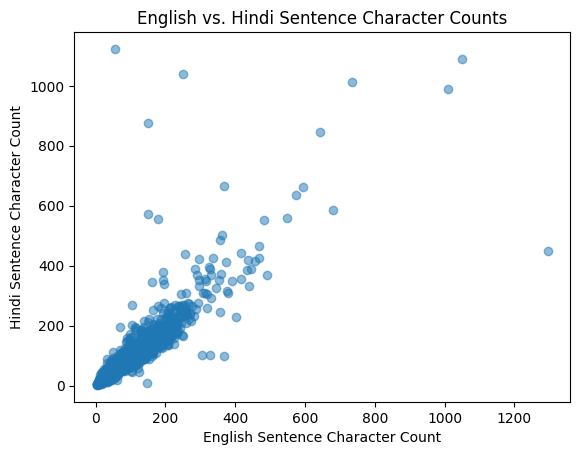

In [ ]:
# Calculate character counts
english_char_counts = [len(sentence) for sentence in df['english_sentence']]
hindi_char_counts = [len(sentence) for sentence in df['hindi_sentence']]

# Create scatter plot
plt.scatter(english_char_counts, hindi_char_counts, alpha=0.5)

# Add labels and title
plt.xlabel('English Sentence Character Count')
plt.ylabel('Hindi Sentence Character Count')
_ = plt.title('English vs. Hindi Sentence Character Counts')

In [ ]:
# convert description to lower case
def get_top_n_words(corpus, vocab, ngram_range=(1,1), min_df=0.01, max_df=0.3):
    vec = CountVectorizer(stop_words = 'english', min_df=20, max_df=max_df,vocabulary=vocab, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [ ]:
# convert description to lower case
def get_top_n_words(corpus, vocab, ngram_range=(1,1), min_df=0.01, max_df=0.3):
    vec = CountVectorizer(stop_words = 'hindi', min_df=20, max_df=max_df,vocabulary=vocab, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [ ]:
corpus1=df['english_sentence'].str.lower()
corpus2=df['hindi_sentence'].str.lower()

In [ ]:
common_term_words_in_english = get_top_n_words(corpus1, dfe, ngram_range=(1,3))

In [ ]:
common_term_words_in_english

[('education', 9),
 ('occasion', 5),
 ('dictionary', 4),
 ('bhopal', 3),
 ('vegetarian', 3),
 ('context', 3),
 ('tourism', 2),
 ('new world', 2),
 ('meerut', 2),
 ('modifications', 2),
 ('hindi poet', 2),
 ('maine', 1),
 ('external links', 1),
 ('speaker protem', 1),
 ('granth list', 1),
 ('video seeing', 1),
 ('exyernal links', 1),
 ('muzaffarpur', 1),
 ('scenic locations', 1),
 ('tamil', 1),
 ('riva', 1),
 ('nevada', 1),
 ('daily yashaarat', 1),
 ('international cricket council', 1),
 ('bibliography', 1),
 ('erijona', 1),
 ('masterpieces', 1),
 ('foreign links', 1),
 ('chief typepad', 1),
 ('acid rains', 1),
 ('delaware', 1),
 ('daal bati', 1),
 ('barabanki district', 1),
 ('devotee poet', 1),
 ('firozabad district', 1),
 ('dharmshala', 1),
 ('sun empire', 1),
 ('fish tenga', 1),
 ('friendly building', 1),
 ('luck', 1),
 ('zankar', 1),
 ('michigan', 1),
 ('terminology', 1),
 ('fruit', 1),
 ('deemoz', 1),
 ('new paths', 1),
 ('north dakota', 1),
 ('montana', 1),
 ('krishinagar distric

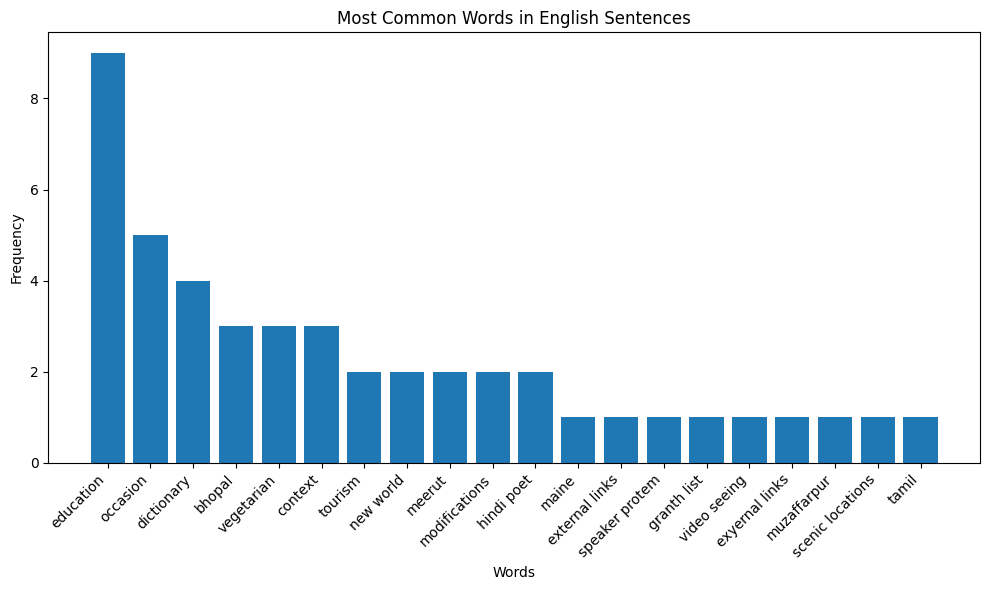

In [ ]:
words, frequencies = zip(*common_term_words_in_english)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words[:20], frequencies[:20])  # Plot the top 20 words
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in English Sentences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df_unigram_20 = pd.DataFrame(common_law_term_words_in_english[:20], columns = ['Word' , 'count']).sort_values(by="count",ascending=False).reset_index(drop=True)

In [ ]:
df_unigram_20

Word  count
0          education      9
1           occasion      5
2         dictionary      4
3             bhopal      3
4         vegetarian      3
5            context      3
6             meerut      2
7      modifications      2
8         hindi poet      2
9          new world      2
10           tourism      2
11             maine      1
12    external links      1
13    speaker protem      1
14       granth list      1
15      video seeing      1
16    exyernal links      1
17       muzaffarpur      1
18  scenic locations      1
19             tamil      1

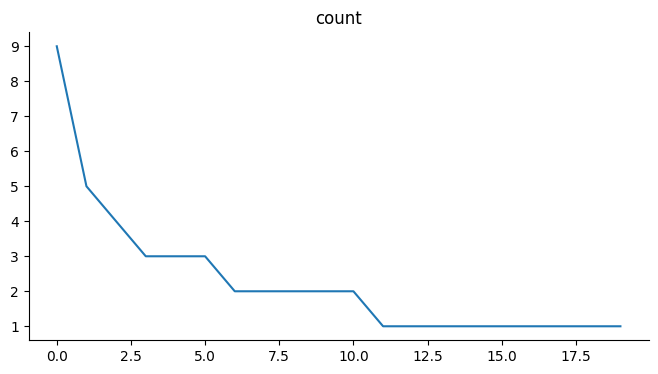

In [ ]:
df_unigram_20['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
common_term_words_in_hindi = get_top_n_words(corpus2, dfh, ngram_range=(1,3))

In [ ]:
common_term_words_in_hindi

[('फल', 7),
 ('राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है .', 0),
 ('मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,', 0),
 ('यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।', 0),
 ('हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते', 0),
 ('इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।', 0),
 ('कश्मीर के तत्कालीन गवर्नर ने इस हस्तांतरण का विरोध किया था , लेकिन अंग्रेजों की सहायता से उनकी आवाज दबा दी गयी .',
  0),
 ('इसमें तुमसे पूर्व गुज़रे हुए लोगों के हालात हैं।', 0),
 ('और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं', 0),
 ('ग्लोबल वॉर्मिंग से आशय हाल ही के दशकों में हुई वार्मिंग और इसके निरंतर बने रहने के अनुमान और इसके अप्रत्यक्ष रूप से मानव पर पड़ने वाले प्रभाव से है।',
  0),
 ('हो सकता है कि आप चाहते हों कि आप का नऋर्नमेनटेन्ड ह्यबिना किसी समर्थन के हृ विशेष स्कूल , या किसी स्वतंत्र स्कूल में जाए , इजसके पास विशेष शैक्षणिक जऋऋरतों वाले बच्चों के प्रति सहूलियत हों . .',
  0),
 ('कृपया यह सुनिश्चित कर लें कि आप सही फॉर्म का प्रयोग कर रहें हैं .', 0),
 ('श

In [ ]:
!wget -q -O /usr/share/fonts/truetype/NotoSansDevanagari-Regular.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf

In [ ]:
import plotly.graph_objects as go

# Your existing code to extract words and frequencies
words, frequencies = zip(*common_term_words_in_hindi)

# Create a bar plot using Plotly
fig = go.Figure(data=[
    go.Bar(x=list(words[:20]), y=list(frequencies[:20]), marker_color='orange')
])

fig.update_layout(
    title='हिंदी वाक्यों में सबसे सामान्य शब्द"',
    xaxis_title='Words',
    yaxis_title='Frequency',
    xaxis_tickangle=-45  # Rotate x-axis labels for readability
)

fig.show()

In [ ]:
# Import necessary libraries from Bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

# Prepare data for the plot
# Extract words and their corresponding frequencies
words, frequencies = zip(*common_term_words_in_hindi)

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data=dict(words=words[:20], frequencies=frequencies[:20]))

# Initialize the Bokeh figure
p = figure(
    x_range=source.data['words'],
    height=400,
    title="हिंदी वाक्यों में सबसे सामान्य शब्द",  # Title in Hindi: "Most Common Words in Hindi Sentences"
    toolbar_location=None,
    tools=""
)

p.vbar(
    x='words',
    top='frequencies',
    width=0.9,
    source=source,
    legend_field="words",
    line_color='white',
    fill_color='navy'
    )


p.xaxis.axis_label = "शब्द"
p.yaxis.axis_label = "आवृत्ति"
p.xaxis.major_label_orientation = "vertical"
p.legend.orientation = "vertical"
p.legend.location = "top_center"

p.ygrid.grid_line_color = 'gray'
p.ygrid.grid_line_alpha = 0.5

p.vbar(
    x='words',
    top='frequencies',
    width=1,
    source=source,
    legend_field="words",
    line_color='white',
    fill_color='white'
)

show(p)

#**KEYWORDS BY TOPIC**

**-> For English:**

In [ ]:
df_education = df[df['english_sentence'] == 'education']
df_occasion = df[df['english_sentence'] == 'occasion']
df_dictionary = df[df['english_sentence'] == 'dictionary']
df_bhopal = df[df['english_sentence'] == 'bhopal']
df_vegetarian = df[df['english_sentence'] == 'vegetarian']
df_context = df[df['english_sentence'] == 'context']
df_tourism = df[df['english_sentence'] == 'tourism']
df_new_world = df[df['english_sentence'] == 'new world']
df_meerut = df[df['english_sentence'] == 'meerut']
df_modifications = df[df['english_sentence'] == 'modifications']

In [ ]:
education_common_term_words = get_top_n_words(df_education['english_sentence'].str.lower(), dfe , ngram_range=(1,3))
occasion_common_term_words = get_top_n_words(df_occasion['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
dictionary_common_term_words = get_top_n_words(df_dictionary['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
bhopal_common_term_words = get_top_n_words(df_bhopal['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
vegetarian_common_term_words = get_top_n_words(df_vegetarian['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
context_common_term_words = get_top_n_words(df_context['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
tourism_common_term_words = get_top_n_words(df_tourism['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
new_world_common_term_words = get_top_n_words(df_new_world['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
meerut_common_term_words = get_top_n_words(df_meerut['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))
df_modifications_common_term_words = get_top_n_words(df_modifications['english_sentence'].str.lower(), dfe, ngram_range=(1, 3))

In [ ]:
outcome_mapper = {
    'education': education_common_term_words,
    'occasion': occasion_common_term_words,
    'dictionary': dictionary_common_term_words,
    'bhopal': bhopal_common_term_words,
    'vegetarian': vegetarian_common_term_words,
    'context': context_common_term_words,
    'tourism': tourism_common_term_words,
    'new_world': new_world_common_term_words,
    'meerut': meerut_common_term_words,
    'modifications': df_modifications_common_term_words
}

In [ ]:
import plotly.express as px

def display(outcome, mi, ma):
    data = pd.DataFrame(outcome_mapper[outcome][mi:ma], columns=['Word', 'count']).sort_values(by="count", ascending=False).reset_index(drop=True)
    title = f'{outcome} top {mi}~{ma} keywords'

    fig = px.bar(data, x='count', y='Word', title=title, orientation='h')
    fig.update_layout(width=1000, height=1500)  # Set width and height in pixels
    fig.show()

In [ ]:
display('education', 0, 20)

In [ ]:
display('occasion', 0, 20)

In [ ]:
display('dictionary', 0, 20)

In [ ]:
display('bhopal', 0, 20)

In [ ]:
display('vegetarian', 0, 20)

In [ ]:
display('context', 20, 50)

In [ ]:
display('tourism', 0, 20)

In [ ]:
display('new_world', 0, 20)

In [ ]:
display('meerut', 0, 20)

In [ ]:
display('modifications', 0, 20)

In [ ]:
def get_topn_df(mi, ma):
    data = pd.DataFrame()
    data['education'] = list(map(lambda x: x[0], sorted(education_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['occasion'] = list(map(lambda x: x[0], sorted(occasion_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['dictionary'] = list(map(lambda x: x[0], sorted(dictionary_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['bhopal'] = list(map(lambda x: x[0], sorted(bhopal_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['vegetarian'] = list(map(lambda x: x[0], sorted(vegetarian_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['context'] = list(map(lambda x: x[0], sorted(context_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['tourism'] = list(map(lambda x: x[0], sorted(tourism_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['new_world'] = list(map(lambda x: x[0], sorted(new_world_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['meerut'] = list(map(lambda x: x[0], sorted(meerut_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    data['modifications'] = list(map(lambda x: x[0], sorted(df_modifications_common_term_words, key=lambda x: x[1], reverse=True)[mi:ma]))
    return data

In [ ]:
def build_corr_df(data, mi, ma):
    m = len(data.columns)
    matrix = [[0 for _ in range(m)] for _ in range(m)]
    for i in range(m):
        for j in range(m):
            same_keywords = len(set(data[data.columns[i]]).intersection(set(data[data.columns[j]])))
            matrix[i][j] = 1.0*same_keywords/(ma-mi)
    return pd.DataFrame(matrix, columns=data.columns, index=data.columns)

In [ ]:
def build_topn_similarity(mi, ma):
    return build_corr_df(get_topn_df(mi, ma), mi, ma)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare the data
top50_similarity = build_topn_similarity(0, 50)
top50_100_similarity = build_topn_similarity(50, 100)
top100_similarity = build_topn_similarity(0, 100)
top200_similarity = build_topn_similarity(0, 200)
top100_200_similarity = build_topn_similarity(100, 200)

# Create subplots
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "Top 50 Similarity",
        "Top 50 to 100 Similarity",
        "Top 100 Similarity",
        "Top 200 Similarity",
        "Top 100 to 200 Similarity"
    )
)

# Add heatmaps to the subplots
fig.add_trace(
    go.Heatmap(z=top50_similarity, colorscale='Viridis'),
    row=1, col=1
)

fig.add_trace(
    go.Heatmap(z=top50_100_similarity, colorscale='Viridis'),
    row=1, col=2
)

fig.add_trace(
    go.Heatmap(z=top100_similarity, colorscale='Viridis'),
    row=2, col=1
)

fig.add_trace(
    go.Heatmap(z=top200_similarity, colorscale='Viridis'),
    row=2, col=2
)

fig.add_trace(
    go.Heatmap(z=top100_200_similarity, colorscale='Viridis'),
    row=3, col=1
)

# Update layout
fig.update_layout(
    height=800,  # Adjust the height of the figure
    title_text='Similarity Heatmaps',
    showlegend=False
)

# Show the figure
fig.show()

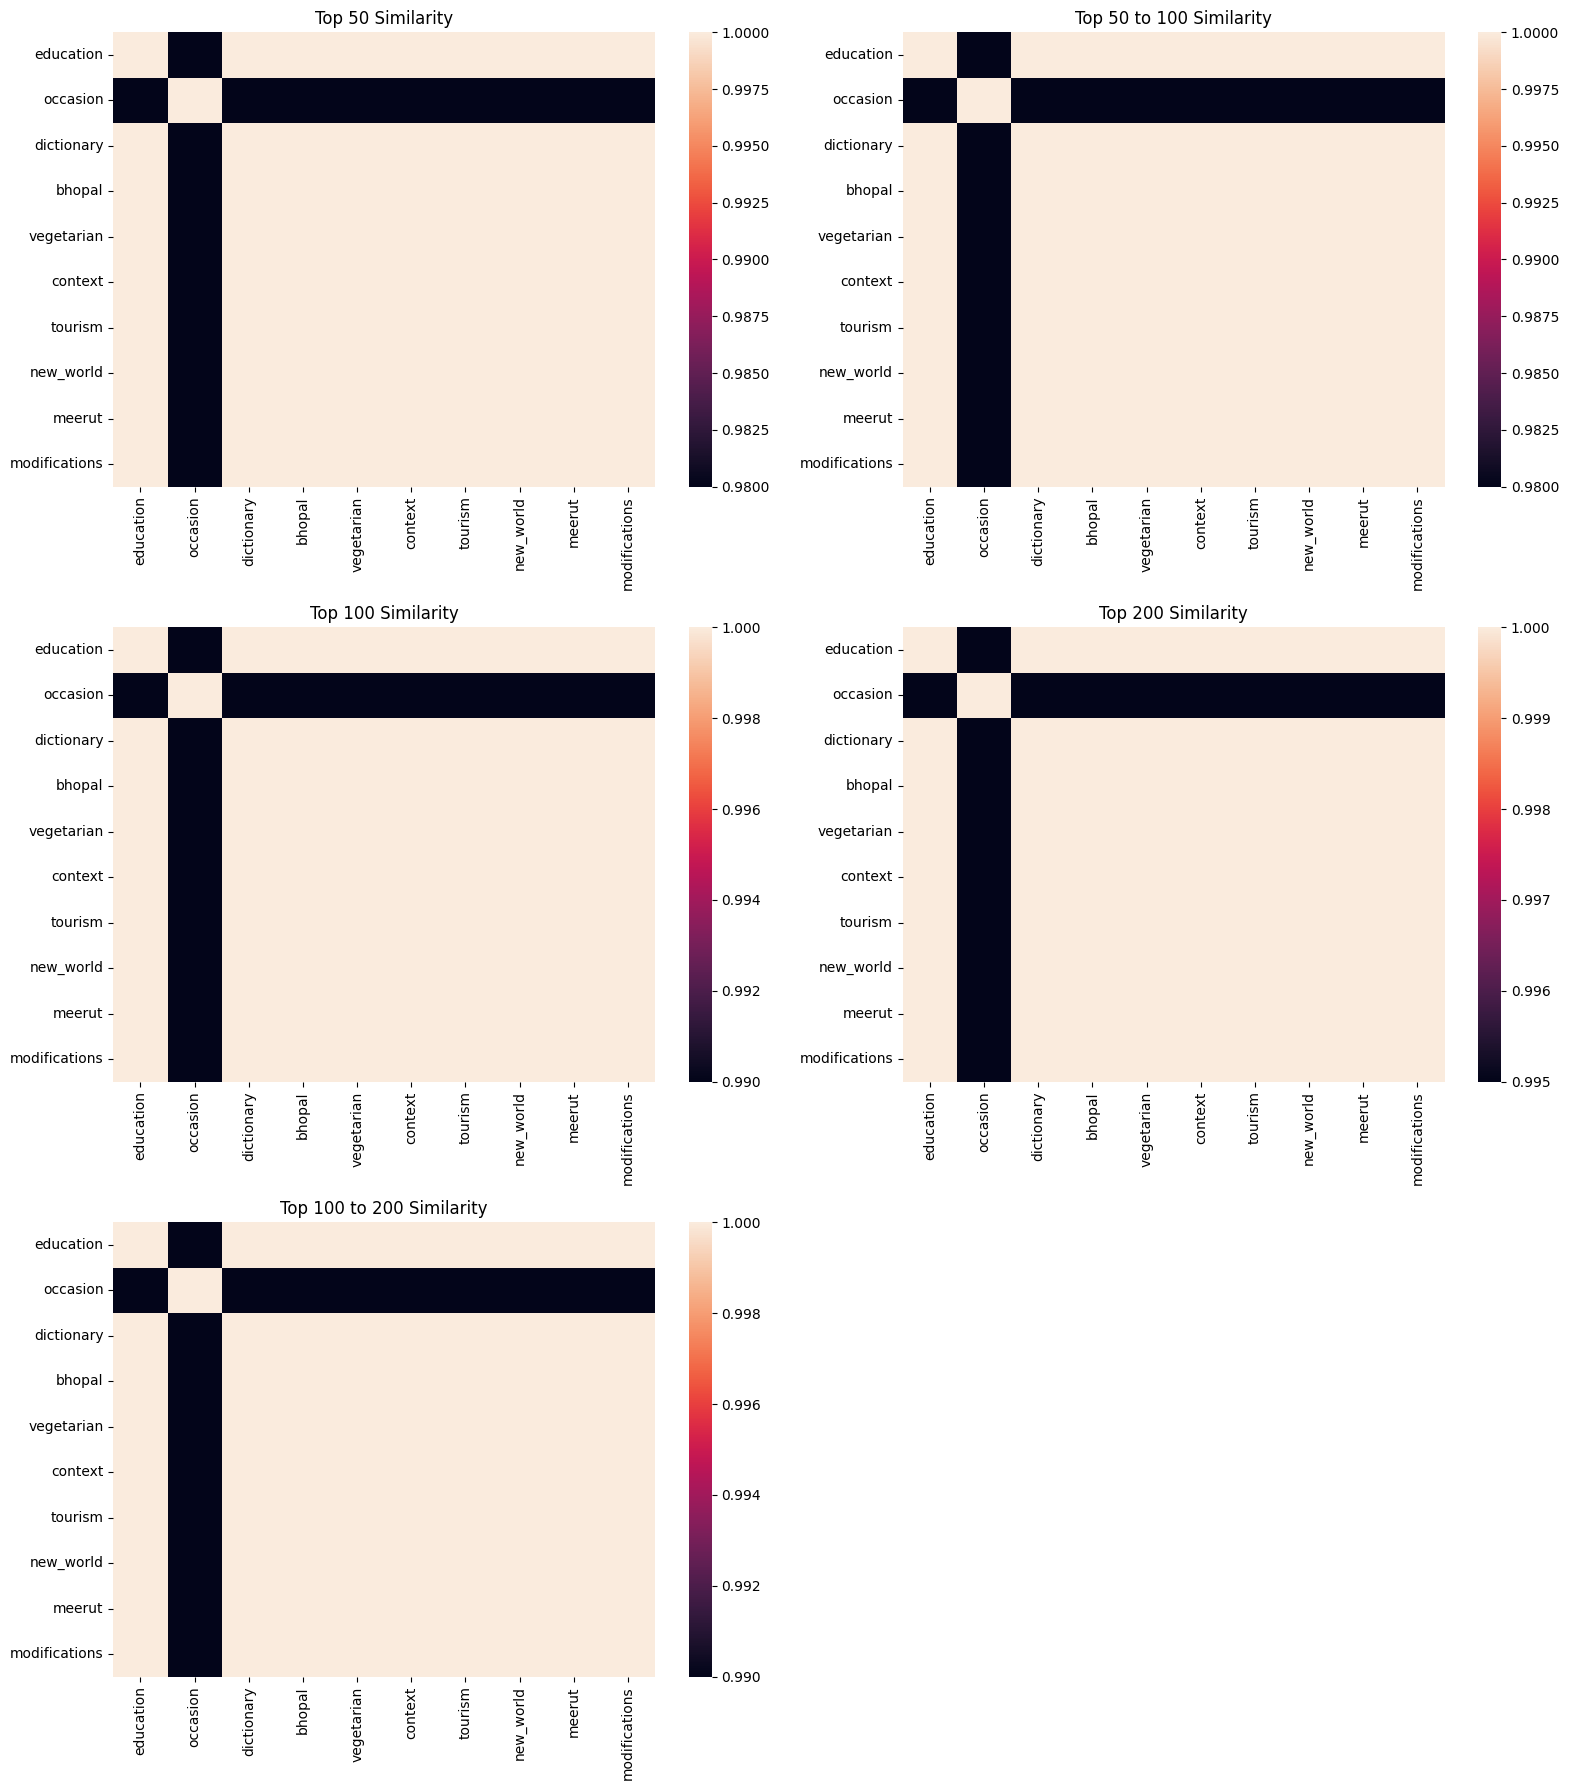

In [ ]:
# Prepare the data
top50_similarity = build_topn_similarity(0, 50)
top50_100_similarity = build_topn_similarity(50, 100)
top100_similarity = build_topn_similarity(0, 100)
top200_similarity = build_topn_similarity(0, 200)
top100_200_similarity = build_topn_similarity(100, 200)

# Create a single figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns

# Plot the first heatmap in the first row, first column
sns.heatmap(top50_similarity, ax=axes[0, 0]).set(title='Top 50 Similarity')
# Plot the second heatmap in the first row, second column
sns.heatmap(top50_100_similarity, ax=axes[0, 1]).set(title='Top 50 to 100 Similarity')

# Plot the third heatmap in the second row, first column
sns.heatmap(top100_similarity, ax=axes[1, 0]).set(title='Top 100 Similarity')
# Plot the fourth heatmap in the second row, second column
sns.heatmap(top200_similarity, ax=axes[1, 1]).set(title='Top 200 Similarity')

# Plot the fifth heatmap in the third row, first column
sns.heatmap(top100_200_similarity, ax=axes[2, 0]).set(title='Top 100 to 200 Similarity')

# Remove the empty subplot in the last row, last column
axes[2, 1].axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
top50_100_similarity

education  occasion  dictionary  bhopal  vegetarian  context  \
education           1.00      0.98        1.00    1.00        1.00     1.00   
occasion            0.98      1.00        0.98    0.98        0.98     0.98   
dictionary          1.00      0.98        1.00    1.00        1.00     1.00   
bhopal              1.00      0.98        1.00    1.00        1.00     1.00   
vegetarian          1.00      0.98        1.00    1.00        1.00     1.00   
context             1.00      0.98        1.00    1.00        1.00     1.00   
tourism             1.00      0.98        1.00    1.00        1.00     1.00   
new_world           1.00      0.98        1.00    1.00        1.00     1.00   
meerut              1.00      0.98        1.00    1.00        1.00     1.00   
modifications       1.00      0.98        1.00    1.00        1.00     1.00   

               tourism  new_world  meerut  modifications  
education         1.00       1.00    1.00           1.00  
occasion          0.98       0.98    0.98           0.98  
dictionary        1.00       1.00    1.00           1.00  
bhopal            1.00       1.00    1.00           1.00  
vegetarian        1.00       1.00    1.00           1.00  
context           1.00       1.00    1.00           1.00  
tourism           1.00       1.00    1.00           1.00  
new_world         1.00       1.00    1.00           1.00  
meerut            1.00       1.00    1.00           1.00  
modifications     1.00       1.00    1.00           1.00

In [ ]:
import csv
import sys
def get_csv(csv_path):
    all_data = []
    with open(csv_path, encoding="UTF-8-sig") as f:
        f_csv = csv.DictReader(f)
        for row in f_csv:
            all_data.append(dict(row))
    return all_data

In [ ]:
def get_title_keyword_abstract(raw_list):
    documents = []
    for h in raw_list:
        tit_key_abs = h.get("english_sentence") + h.get("hindi_sentence")
        # print(tit_key_abs)
        documents.append(tit_key_abs)
    return documents

In [ ]:
csv.field_size_limit(sys.maxsize)
Data_dict = get_csv("/content/english_to_hindi.csv")
Data_all = get_title_keyword_abstract(Data_dict)
print(len(Data_all))

2000


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stopwords_list = set(stopwords.words('english'))
print(stopwords_list)

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [w for w in words if w.lower() not in stopwords_list]
    return ' '.join(words)

Data_final = []
for data in Data_all:
    Data_final.append(clean_text(data))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'further', "hasn't", 'm', 'wasn', 'whom', 're', 'mustn', 'because', 'me', 'between', 'so', 'doing', 'with', 'myself', "you'd", 'there', 'yours', 'about', 'what', 'than', 'if', 'hadn', 'which', "needn't", 'then', 'y', 'at', 'you', 'is', "didn't", 'some', 'won', 'for', 'hers', 'down', 'the', 'how', "couldn't", 'other', "you've", 'am', 'same', 'shouldn', 'a', 't', 'she', "shouldn't", "you're", 'under', 'why', "wouldn't", 'again', 'can', 'd', 'theirs', "hadn't", 'or', 'should', 'only', 'mightn', 'did', 'isn', 'through', 'shan', 'are', 'were', 'as', "mightn't", 'does', 'during', "aren't", 'don', 'above', 'do', 's', 'itself', 'and', 've', 'couldn', 'until', 'ours', 'haven', "mustn't", 'herself', 'now', 'this', 'being', 'll', 'weren', 'here', 'from', 'yourself', 'them', 'into', 'hasn', 'themselves', 'our', 'they', 'will', 'when', "she's", "doesn't", "you'll", 'yourselves', 'these', 'its', 'before', 'needn', 'we', 'been', 'out', 'after', "should've", 'aren', 'to', 'has', "that'll", 'any', 'no

**Cannot be used for the hindi part of the dataset**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

In [ ]:
embedding_model = SentenceTransformer("paraphrase-MiniLM-L3-v2")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
umap_model=UMAP(n_neighbors=15, n_components=5, min_dist=0.1)
hdbscan_model=HDBSCAN(min_cluster_size=10, min_samples=1, cluster_selection_method='eom')

In [ ]:
vectorizer_model = CountVectorizer()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [ ]:
datax=Data_final[0:2000]
datax

['politicians permission needs doneरजनतजञ क पस ज करय करन चहए वह करन क अनमत नह ह',
 'Id like tell one childमई आपक ऐस ह एक बचच क बर म बतन चहग',
 'percentage even greater percentage Indiaयह परतशत भरत म हनदओ परतशत स अधक ह',
 'really mean theyre bad paying attentionहम य नह कहन चहत क व धयन नह द पत',
 'ending portion Vedas called Upanishadइनह वद क अतम भग उपनषद कहलत ह',
 'Governor Kashmir resisted transfer finally reduced subjection aid British कशमर क ततकलन गवरनर न इस हसततरण क वरध कय थ लकन अगरज क सहयत स उनक आवज दब द गय',
 'lies circumstances people youइसम तमस परव गजर हए लग क हलत ह',
 'say even wrongऔर हम हत कन ह यह कहन भ वल क व गलत ह',
 'Global Warming refer warming caused recent decades probability continual presence indirect effect human beingगलबल वरमग स आशय हल ह क दशक म हई वरमग और इसक नरतर बन रहन क अनमन और इसक अपरतयकष रप स मनव पर पडन वल परभव स ह',
 'may want child go school run LEA nonmaintained special school independent school meet child needs ह सकत ह क आप चहत ह क आप क नऋरनमनटनड हयबन कस स

#**PT. 2. Assign Parameters to manually optimize the BERTopic Model for text categorization, main/important word extraction, and visualize them.**

In [ ]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    nr_topics=50,
    min_topic_size= 7,
    n_gram_range=(1, 3),
    top_n_words = 10
)

topics, probabilities = topic_model.fit_transform(datax)

In [ ]:
def summarize_bertopic_model(topic_model):
    print("=== BERTopic Model Summary ===")

    # Display model parameters
    print(f"Number of Topics: {topic_model.nr_topics}")
    print(f"Minimum Topic Size: {topic_model.min_topic_size}")
    print(f"N-Gram Range: {topic_model.n_gram_range}")
    print(f"Top N Words per Topic: {topic_model.top_n_words}\n")

    # Display the embedding model used
    print(f"Embedding Model: {topic_model.embedding_model.__class__.__name__}")

    # Display UMAP parameters
    print(f"UMAP Model: {topic_model.umap_model}")
    if hasattr(topic_model.umap_model, 'n_neighbors'):
        print(f"UMAP n_neighbors: {topic_model.umap_model.n_neighbors}")

    # Display HDBSCAN parameters
    print(f"HDBSCAN Model: {topic_model.hdbscan_model}")
    if hasattr(topic_model.hdbscan_model, 'min_cluster_size'):
        print(f"HDBSCAN min_cluster_size: {topic_model.hdbscan_model.min_cluster_size}")

    # Vectorizer model specifications
    print(f"\nVectorizer Model: {topic_model.vectorizer_model.__class__.__name__}")
    if hasattr(topic_model.vectorizer_model, 'ngram_range'):
        print(f"Vectorizer ngram_range: {topic_model.vectorizer_model.ngram_range}")

    # C-TFIDF model specifications
    print(f"C-TFIDF Model: {topic_model.ctfidf_model.__class__.__name__}")

    # Display topic probabilities (optional)
    probabilities = topic_model.probabilities_
    print("\n=== Topic Probabilities (first 5) ===")
    print(probabilities[:5])  # Show probabilities for the first 5 documents

# Call the summary function
summarize_bertopic_model(topic_model)

=== BERTopic Model Summary ===
Number of Topics: 50
Minimum Topic Size: 7
N-Gram Range: (1, 3)
Top N Words per Topic: 10

Embedding Model: SentenceTransformerBackend
UMAP Model: UMAP(n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})
UMAP n_neighbors: 15
HDBSCAN Model: HDBSCAN(min_cluster_size=10, min_samples=1)
HDBSCAN min_cluster_size: 10

Vectorizer Model: CountVectorizer
Vectorizer ngram_range: (1, 1)
C-TFIDF Model: ClassTfidfTransformer

=== Topic Probabilities (first 5) ===
[0.77099804 1.         0.         0.         1.        ]


In [ ]:
topic_model.get_document_info(datax)

Document  Topic  \
0     politicians permission needs doneरजनतजञ क पस ज...      3   
1     Id like tell one childमई आपक ऐस ह एक बचच क बर ...     15   
2     percentage even greater percentage Indiaयह परत...     -1   
3     really mean theyre bad paying attentionहम य नह...     -1   
4     ending portion Vedas called Upanishadइनह वद क ...      0   
...                                                 ...    ...   
1995  share achievements need आप उनक उपलबधय म भगदर ह...      3   
1996  scientific consensus also causes recent warmin...     20   
1997                                Hes like Huhवह बल ह      5   
1998  neck heavy ears flabby horns twisted pointed ग...     25   
1999               could prostituteवह वशयवत नह कर सकत थ     -1   

                                Name  \
0     3_clean_left_robust_affordable   
1            15_2005_id_move_example   
2                   -1_आप_पहल_वरष_रह   
3                   -1_आप_पहल_वरष_रह   
4              0_change_हम_बहत_youve   
...                              ...   
1995  3_clean_left_robust_affordable   
1996     20_climate_जलवय_गरम_surface   
1997               5_sort_सचमच_28_im   
1998      25_mountain_peaks_परवत_शखर   
1999                -1_आप_पहल_वरष_रह   

                                         Representation  \
0     [clean, left, robust, affordable, 1985, कयकलप,...   
1     [2005, id, move, example, wave, urban, profitव...   
2      [आप, पहल, वरष, रह, later, वह, कर, space, सथ, हम]   
3      [आप, पहल, वरष, रह, later, वह, कर, space, सथ, हम]   
4     [change, हम, बहत, youve, think, know, वशवक, उत...   
...                                                 ...   
1995  [clean, left, robust, affordable, 1985, कयकलप,...   
1996  [climate, जलवय, गरम, surface, temperature, gre...   
1997  [sort, सचमच, 28, im, think, समझत, really, weap...   
1998  [mountain, peaks, परवत, शखर, चटय, हमलय, situat...   
1999   [आप, पहल, वरष, रह, later, वह, कर, space, सथ, हम]   

                                    Representative_Docs  \
0     [place always kept properly drained बकर क जह र...   
1     [one came next morning saidऔर उनम स एक मर पस अ...   
2     [opened school name daughter law Barabanki ins...   
3     [opened school name daughter law Barabanki ins...   
4     [recovered longer man और जब व उसस बर हए त उनह ...   
...                                                 ...   
1995  [place always kept properly drained बकर क जह र...   
1996  [reason difference scenarios using various mod...   
1997  [think really one sort ofयह भ सच ज सकत ह क इन ...   
1998  [highest mountain peaks world situated Himalay...   
1999  [opened school name daughter law Barabanki ins...   

                                            Top_n_words  Probability  \
0     clean - left - robust - affordable - 1985 - कय...     0.770998   
1     2005 - id - move - example - wave - urban - pr...     1.000000   
2     आप - पहल - वरष - रह - later - वह - कर - space ...     0.000000   
3     आप - पहल - वरष - रह - later - वह - कर - space ...     0.000000   
4     change - हम - बहत - youve - think - know - वशव...     1.000000   
...                                                 ...          ...   
1995  clean - left - robust - affordable - 1985 - कय...     1.000000   
1996  climate - जलवय - गरम - surface - temperature -...     1.000000   
1997  sort - सचमच - 28 - im - think - समझत - really ...     0.818797   
1998  mountain - peaks - परवत - शखर - चटय - हमलय - s...     1.000000   
1999  आप - पहल - वरष - रह - later - वह - कर - space ...     0.000000   

      Representative_document  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
...                       ...  
1995                    False  
1996                    False  
1997                    False  
1998                     True  
1999                    False  

[2000 rows x 8 columns]

In [ ]:
topic_model.get_topic_freq()

Topic  Count
2      -1    711
3       0    140
10      1     71
25      2     67
0       3     63
9       4     47
8       5     47
21      6     46
14      7     46
33      8     40
6       9     38
20     10     33
22     11     29
18     12     29
26     13     28
12     14     27
1      15     26
38     16     24
4      17     22
40     18     21
29     19     21
5      20     21
27     21     21
32     22     20
35     23     19
24     24     19
36     25     18
13     26     18
17     27     17
28     28     17
34     29     17
19     30     16
37     31     15
41     32     15
11     33     14
31     34     14
44     35     14
46     36     13
48     37     13
43     38     13
23     39     13
15     40     13
42     41     12
39     42     11
30     43     11
7      44     10
45     45     10
47     46     10
16     47     10
49     48     10

In [ ]:
for i in range(topic_model.get_topic_freq().shape[0]):
  print(topic_model.get_topic(i))

[('change', 0.2791961181136439), ('हम', 0.2750669498667145), ('बहत', 0.2722750878630536), ('youve', 0.2662813435965424), ('think', 0.26444294556180964), ('know', 0.2595388772576171), ('वशवक', 0.24553562938055448), ('उतरन', 0.24553562938055448), ('indeed', 0.24553562938055448), ('thinking', 0.24553562938055448)]
[('education', 0.21019068553896275), ('पत', 0.2054429997266868), ('facilities', 0.19692571706078943), ('achievement', 0.19692571706078943), ('शकष', 0.19208850460504787), ('चहए', 0.19102628124306173), ('जवन', 0.1882673593304972), ('great', 0.18561051633767547), ('life', 0.18487888526136723), ('real', 0.1832892422713336)]
[('gandhi', 0.25657786038686353), ('शरकषण', 0.24757465521040295), ('krishna', 0.24564777390169562), ('mahatma', 0.23990602531129662), ('गध', 0.23737349512103736), ('महतम', 0.23429342488320376), ('धरम', 0.2245976237912327), ('बरहमण', 0.21900323624067083), ('brahman', 0.2186439846428803), ('रवनदरनथ', 0.21294639847475372)]
[('clean', 0.31749766053640177), ('left', 0

#**PT.3. -> Possible Clean and Robust Visualizations**

In [ ]:
topic_model.visualize_barchart(top_n_topics=50)

In [ ]:
embeddings = embedding_model.encode(datax, show_progress_bar=False)
topic_model.visualize_documents(datax, embeddings=embeddings, hide_annotations=True)

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_term_rank()